<a href="https://colab.research.google.com/github/bhargav23/EVA4/blob/master/S8/EVA_S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA/S7')


In [0]:
import Albumentations
trans = Albumentations.ATransforms

train_transforms = trans.train_transforms(
    [transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
    )

test_transforms = trans.test_transforms(
    [transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
    )


In [5]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import evadataloader
dataloader = evadataloader.DataLoader()

trainloader = dataloader.load(trainset)
testloader = dataloader.load(testset)

Let us show some of the training images, for fun.



 frog  ship horse  ship


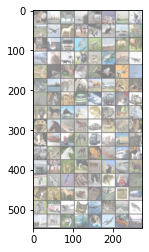

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import evamodel

net = evamodel.ResNet18()

In [0]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import copy

In [0]:
import evascheduler

In [0]:
from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.9187363386154175 Batch_id=390 Accuracy=53.56: 100%|██████████| 391/391 [03:16<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5174, Accuracy: 4826/10000 (48.26%)

EPOCH: 1


Loss=0.6812072992324829 Batch_id=390 Accuracy=73.12: 100%|██████████| 391/391 [03:19<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2818, Accuracy: 7182/10000 (71.82%)

EPOCH: 2


Loss=0.5765878558158875 Batch_id=390 Accuracy=81.77: 100%|██████████| 391/391 [03:18<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2169, Accuracy: 7831/10000 (78.31%)

EPOCH: 3


Loss=0.3296174108982086 Batch_id=390 Accuracy=87.27: 100%|██████████| 391/391 [03:19<00:00,  2.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2563, Accuracy: 7437/10000 (74.37%)

EPOCH: 4


Loss=0.45049914717674255 Batch_id=390 Accuracy=91.55: 100%|██████████| 391/391 [03:17<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2310, Accuracy: 7690/10000 (76.90%)

EPOCH: 5


Loss=0.23017196357250214 Batch_id=390 Accuracy=94.14: 100%|██████████| 391/391 [03:20<00:00,  2.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2254, Accuracy: 7746/10000 (77.46%)

EPOCH: 6


Loss=0.050334542989730835 Batch_id=390 Accuracy=98.68: 100%|██████████| 391/391 [03:17<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1577, Accuracy: 8423/10000 (84.23%)

EPOCH: 7


Loss=0.00810549221932888 Batch_id=390 Accuracy=99.79: 100%|██████████| 391/391 [03:19<00:00,  2.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1587, Accuracy: 8413/10000 (84.13%)

EPOCH: 8


Loss=0.013015829026699066 Batch_id=85 Accuracy=99.94:  22%|██▏       | 86/391 [00:43<02:34,  1.97it/s]